In [1]:
import pandas as pd
iopub_data_rate_limit=200000000.0 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv("/users/amulya/Downloads/archive (6)/adult_test.csv")
# print(df.columns)
unwanted_columns = ['Unnamed: 2','education-num']
df = df.drop(unwanted_columns, axis = 1)
# print(df.dtypes)
df.replace(' ?', 'Other', inplace=True)
nullcounts = df.apply(lambda x: x[x == ' ?'].count())
# print(nullcounts)
null_values = df.isna().sum()
# print(null_values)
df['Income'] = df['Income'].replace({' <=50K.' :0, ' >50K.' : 1 })
# df['Income'] = df['Income'].replace({' Approved': 1, ' Rejected': 0})
# print(df['Income'])
a = df['age'].value_counts()
# print(a)
print(df.describe().T)
df['workclass'] = df['workclass'].replace({' Never-worked': ' Without-pay'})
df['education'] = df['education'].replace({' 10th': 'Schooling', ' 1St-4th': 'Schooling', ' 5th-6th': 'Schooling',' 7th-8th':'Schooling',' 9th':'Schooling',' 11th':'Intermediate',' 12th':'Intermediate'})
df['marital-status'] = df['marital-status'].replace({' Married-AF-spouse': ' Married-civ-spouse'})
workclass_dummies = pd.get_dummies(df['workclass'])
# df = df.drop('season',axis = 1)
df = pd.concat([df, workclass_dummies], axis=1)
education_dummies = pd.get_dummies(df['education'])
df = pd.concat([df,education_dummies],axis = 1)
maritalStatus_dummies = pd.get_dummies(df['marital-status'])
df = pd.concat([df,maritalStatus_dummies],axis=1)
occupation_dummies = pd.get_dummies(df['occupation'])
df = pd.concat([df,occupation_dummies],axis=1)
relationship_dummies = pd.get_dummies(df['relationship'])
df = pd.concat([df,relationship_dummies],axis=1)
race_dummies = pd.get_dummies(df['race'])
df = pd.concat([df,race_dummies],axis=1)
sex_dummies = pd.get_dummies(df['sex'])
df = pd.concat([df,sex_dummies],axis=1)
country_dummies = pd.get_dummies(df['native-country'])
df = pd.concat([df,country_dummies],axis=1)
duplicate_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
df = df.drop(duplicate_columns,axis = 1)

y = df['Income']
x = df.drop('Income',axis = 1)
age= df['age']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)
X_scaled_df['age column'] = age
# print(X_scaled_df['age column'])
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)
actual_age = x_test['age column']
# print(actual_age)
x_train = x_train.drop('age column',axis = 1)
x_test = x_test.drop('age column',axis = 1)
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("KNN Model Evaluation:")
print(f'Accuracy: {accuracy_knn}')
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1 Score: {f1_knn}')

/var/folders/2t/qm1yw0fs74gbtb4m6jqsrblc0000gp/T/ipykernel_33102/496419037.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Income'] = df['Income'].replace({' <=50K.' :0, ' >50K.' : 1 })


                  count         mean          std   min   25%   50%   75%  \
age             16281.0    38.767459    13.849187  17.0  28.0  37.0  48.0   
capital-gain    16281.0  1081.905104  7583.935968   0.0   0.0   0.0   0.0   
capital-loss    16281.0    87.899269   403.105286   0.0   0.0   0.0   0.0   
hours-per-week  16281.0    40.392236    12.479332   1.0  40.0  40.0  45.0   
Income          16281.0     0.236226     0.424776   0.0   0.0   0.0   0.0   

                    max  
age                90.0  
capital-gain    99999.0  
capital-loss     3770.0  
hours-per-week     99.0  
Income              1.0  
KNN Model Evaluation:
Accuracy: 0.8331627430910952
Precision: 0.7013301088270859
Recall: 0.5052264808362369
F1 Score: 0.5873417721518988


In [13]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

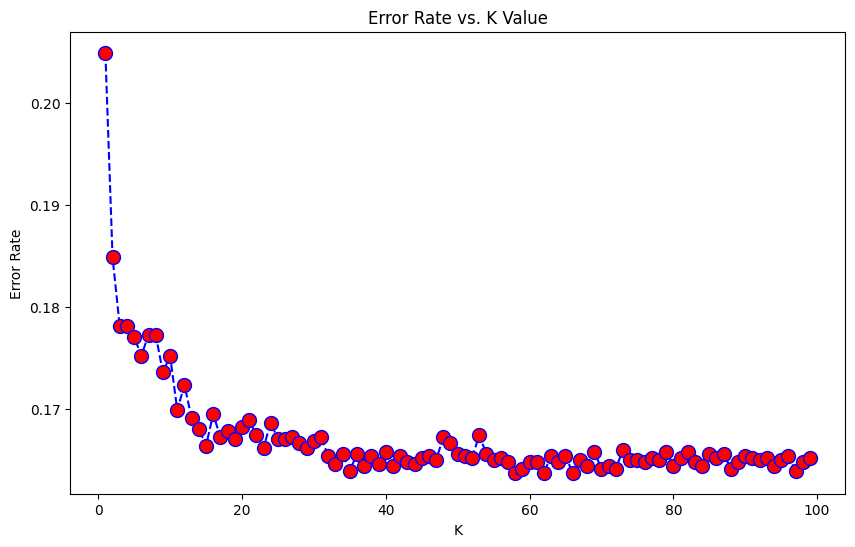

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')